# 1. Business Understanding
## 1.1 Introduction
In 2022, the U.S. real estate industry reached a valuation of USD 3.75 trillion and was projected to grow annually by 5.2% from 2022 to 2030, driven by a growing U.S. population, offering substantial investment prospects. Effective risk management and informed investment decisions are essential for success in this dynamic market.

It was revealed that residential properties yield an average annual return of 10.6%, while commercial properties offer an average return of 9.5%. This project delves into the complexities of the U.S. real estate sector, providing insights, trends, and strategies to empower investors in harnessing the potential of this lucrative market.

This project serves as a consulting opportunity for a real estate investment firm, emphasizing the application of time series analysis. Their core objective is to leverage Zillow Research data for predicting property price trends in diverse zip codes. By harnessing the power of data-driven insights, the firm seeks to enhance investment decision-making, reduce risks, and gain a competitive advantage in the real estate sector. Time series modeling will be instrumental in guiding them toward profitable, compliant, and strategic investments aligned with their long-term goals.

## 1.2 Problem Statement
Over the past two decades, real estate investment in the United States has experienced a remarkable journey, marked by significant shifts, triumphs, and challenges. The period spanning from 1996 to 2018 witnessed a rollercoaster ride in the American real estate market, characterized by boom and bust cycles, regulatory reforms, and evolving market dynamics. From the exuberant highs of the early 2000s housing bubble to the depths of the 2008 financial crisis and subsequent recovery, this era is a fascinating case study in the resilience and adaptability of real estate as an investment vehicle.

To better understand the real estate landscape in the U.S., InnovateIQ Consultants aim to use time series analysis to shed a light on the key factors that influenced investment decisions, and ultimately, the lessons learnt from this dynamic and ever-evolving sector by delving into the transformative events and trends that shaped the U.S. real estate landscape.By harnessing the power of data-driven insights, the firm seeks to enhance investment decision-making, reduce risks, and gain a competitive advantage in the real estate sector.

## 1.3 Objectives
### 1.3.1 Main Objective
The primary aim of this project to leverage time series modeling by providing consultancy for a real-estate investment firm with actionable insights and forecasts pertaining to real estate price dynamics in various zip codes. These time-driven analyses will enable the firm to make informed investment decisions, uncover potential opportunities, and proactively address risks within the ever-changing landscape of the real estate market.
### 1.3.2 Specific Objectives
- Choose and train appropriate time series forecasting models for real estate price data in zip codes.
- Evaluate the potential risks associated with investing in various zip codes based on forecasted real estate price trends, and develop strategies to mitigate these risks.
- Provide tailored investment recommendations for each zip code, including which areas present promising opportunities, which ones require caution, and strategies for optimizing the real estate investment portfolio.

## 1.4 Experimental Design
- Data Collection
- Data Preprocessing
- Exploration Data Analysis
- Reshape from Wide to Long Format
- Time Series Modelling
- Forecasting and Model evaluation
- Conclusion
- Recommendations

## 1.5 Defining the Metric of Success
- Mean Absolute Percentage Error(MAPE) - It quantifies the accuracy of forecasts or predictions by measuring the average percentage difference between the predicted values and the actual values in a dataset. We will use it compare the accuracy of the forecasting models used.

## 1.6 Data Understanding
In this project, we have utilized a dataset sourced from various states within the United States, capturing historical median house prices spanning a 22-year period, ranging from April 1996 to April 2018. This comprehensive dataset was acquired from the Zillow website.
The dataset comprises 14,723 rows and boasts a substantial 272 columns.
Within these 272 columns, four are of a categorical nature, while the remainder are numerical. Here's an overview of the key columns:
- RegionID: This is a unique identifier for each region.
- RegionName: Corresponds to the names of regions, typically representing zip codes.
- City: Provides the city names associated with the respective regions.
- State: Indicates the states in which these regions are located.
- Metro: Identifies the metropolitan areas to which these regions belong.
- County Name: Specifies the names of the counties where these regions are situated.
- Size Rank: Represents the rank of zip codes based on their level of urbanization.
- Date Columns (265 Columns): These encompass a vast array of columns that are likely to contain median house prices over the 22-year duration, providing a detailed historical perspective.

# 2. Importing Libraries

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
import itertools
import warnings
warnings.filterwarnings('ignore')

# 3. Data Collection

In [2]:
# Loading the zillow dataset
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
# Displaying the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [4]:
# Displaying the numeric summary of the dataset
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


In [5]:
# Displaying the number of rows and columns
df.shape

(14723, 272)

The dataset above has both numerical and categorical variables. It has 14723 rows and 272 columns.

# 4. Data Preprocessing
This process involves:
- Renaming the RegionName column
- Converting column names into datetime objects
- Handling missing values
- Checking for duplicates
- Changing the datatypes
- Creating the ROI and CV columns

### 4.1 Renaming the RegionName column

In [6]:
# Renaming the RegionName column to Zipcode
df = df.rename(columns={'RegionName': 'Zipcode'})
df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


### 4.2 Converting column names to datetime objects

In [7]:
#Converting column names into datetime objects as datetime objects based on the 'YYYY-MM' format.
def get_datetimes(df):
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

### 4.3 Detecting and handling missing values

In [8]:
#Checking for missing values in the dataset
df.isnull().sum().sum()

157934

The are 157934 missing data points.

In [9]:
def explore_missing_data(df):

    # Calculate the number of missing values for each column
    missing_data = df.isna().sum()
    
    # Filter columns with missing values
    missing_data = missing_data[missing_data > 0]
    
    # Convert the result to a DataFrame
    missing_data_df = missing_data.to_frame().T
    
    return missing_data_df

In [10]:
explore_missing_data(df)

,Metro,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06
0,1043,1039,1039,1039,1039,1039,1039,1039,1039,1039,...,109,109,109,109,56,56,56,56,56,56


This transposed DataFrame provides a concise horizontal view of the missing data, making it easier to inspect and analyze. The Metro and Date columns contain missing values as seen above.

For the date columns, we will employ interpolation to fill in the missing values. In the 'metro' column, any missing values will be substituted with the label 'missing'.

In [11]:
# Handing missing values in the Metro column
df['Metro'].fillna('missing', inplace=True)

In [12]:
df.isna().sum().sum()

156891

In [13]:
# Filling missing values using linear interpolation
df.interpolate(inplace=True)

In [14]:
df.isna().sum().sum()

0

In [15]:
df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


The dataset has no missing values.

### 4.4 Checking for duplicates

In [16]:
# Checking for duplicates in the dataset
df.duplicated().sum()

0

There are no duplicates in the dataset.

### 4.5 Changing the datatypes

In [17]:
# Exploring the datatype of zipcode column
df.dtypes['Zipcode']

dtype('int64')

Zipcodes correspond to specific geographical locations, making them better suited for categorical data types. Therefore, we will convert the Zipcode column from an integer type to a string type.

In [18]:
# Converting zipcodes to string datatype
df.Zipcode = df.Zipcode.astype('string')
df.dtypes['Zipcode']

string[python]

In [19]:
# Exploring the format of the zip codes
print(df.Zipcode.min())
print(df.Zipcode.max())

1001
99901


There is a variation in the length of zipcodes within the dataset, with some having four digits and others having five. To standardize the format and ensure consistency, we need to restructure the Zipcode column so that all zipcodes consist of five digits. It appears that the zipcodes with four digits are missing a leading zero, which should be added to achieve the desired five-digit format. This adjustment will help maintain uniformity in the data and facilitate accurate analysis.

In [20]:
# The zipcodes need to be 5 digits long, so a zero will be added to the ones that have four digits 
df['Zipcode'] = df['Zipcode'].str.zfill(5)

In [21]:
# Confirming that the Zipcodes are consistent
print(df.Zipcode.min())

01001


In [22]:
# Displaying the first 5 rows
df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


### 4.6 Creating the ROI and CV columns
In order to develop a more comprehensive approach to address the objectives outlined for this project, we will incorporate two additional columns into our dataset: ROI(Return on Investment) and CV (Coefficient of Variation), respectively. These columns will provide valuable insights and enhance our analytical capabilities in pursuit of our project goals.
- Return on Investment (ROI):
ROI serves as an indicator of the anticipated returns from investments.It is a crucial metric for real estate investors as it provides a quantitative measure of the profitability and performance of a real estate investment project. It helps investors make informed decisions, assess risk, and compare different investment opportunities in the dynamic and potentially lucrative real estate market.
- Coefficient of Variation (CV):
CV acts as a gauge of data point dispersion relative to the mean. It quantifies the ratio of the standard deviation to the mean, assisting investors in evaluating the level of volatility or risk in relation to the expected return on investments.

In [23]:
# Calculating and creating a new column -ROI
df['ROI'] = (df['2018-04']/ df['1996-04'])-1

#calculating std to be used to find CV
df["std"] = df.loc[:, "1996-04":"2018-04"].std(skipna=True, axis=1)

#calculating mean to be used to find CV
df["mean"] = df.loc[:, "1996-04":"2018-04"].mean(skipna=True, axis=1)

# calculating and creating a new column - CV
df["CV"] = df['std']/df["mean"]

# dropping std and mean as they are not necessary for analysis
df.drop(["std", "mean"], inplace=True, axis=1)

In [24]:
df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,CV
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,2.083782,0.256487
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,312500,314100,315000,316600,318100,319600,321100,321800,0.365295,0.152680
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320200,320400,320800,321200,321200,323000,326900,329900,0.567966,0.143950
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1.623971,0.237364
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120000,120300,120300,120300,120300,120500,121000,121500,0.571798,0.178326


# 5. Exploratory Data Analysis
In this Exploratory Data Analysis (EDA) section, we will choose a subset of columns from the 'df' dataset for further analysis. We will create visualizations to gain deeper insights into the data. This approach is particularly useful because the dataset is structured in a wide format, and visualizations will help us better comprehend its characteristics.

In my data exploration, I've utilized three different approaches:
- Univariate analysis
  - Numeric Variables
  - Categorical variables
- Bivariate analysis
  - Numeric Variables
  - Categorical variables
- Multivariate analysis
  - Correlation matrix
These visualizations serve the purpose of gaining deeper insights into the data and uncover meaningful patterns, trends, and associations that might otherwise remain hidden.

In [25]:
font = {'family': 'normal',
        'weight': 'bold',
        'size': 16}

plt.rc('font', **font)

In [26]:
# setting a style for plots
sns.set_palette("Spectral")
sns.set_style("darkgrid")

# defining a function to plot time series
def plot_time_series(df,col):
    
    # defining figsize
    plt.figure(figsize=(10,6), tight_layout=True)
    plt.plot(df[col], linewidth=2,label=f"{col}")
    plt.xlabel('Year')
    plt.ylabel(f'{col}')
    plt.title(f'{col} through the years')
    plt.legend()
    plt.show()

In [27]:
df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,CV
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,2.083782,0.256487
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,312500,314100,315000,316600,318100,319600,321100,321800,0.365295,0.152680
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320200,320400,320800,321200,321200,323000,326900,329900,0.567966,0.143950
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1.623971,0.237364
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120000,120300,120300,120300,120300,120500,121000,121500,0.571798,0.178326


In [28]:
eda_df = df[['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'ROI', 'CV']]
eda_df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,CV
0,84654,60657,Chicago,IL,Chicago,Cook,1,2.083782,0.256487
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,0.365295,0.152680
2,91982,77494,Katy,TX,Houston,Harris,3,0.567966,0.143950
3,84616,60614,Chicago,IL,Chicago,Cook,4,1.623971,0.237364
4,93144,79936,El Paso,TX,El Paso,El Paso,5,0.571798,0.178326


## 5.1 Univariate Analysis
### 5.1.1 Numeric Variables

In [29]:
# Making a list of numeric columns
Numeric = eda_df[['RegionID','Zipcode','SizeRank','ROI', 'CV']]
Numeric.head()

,RegionID,Zipcode,SizeRank,ROI,CV
0,84654,60657,1,2.083782,0.256487
1,90668,75070,2,0.365295,0.152680
2,91982,77494,3,0.567966,0.143950
3,84616,60614,4,1.623971,0.237364
4,93144,79936,5,0.571798,0.178326


In [30]:
for column in Numeric:
    eda_df[column] = pd.to_numeric(eda_df[column])

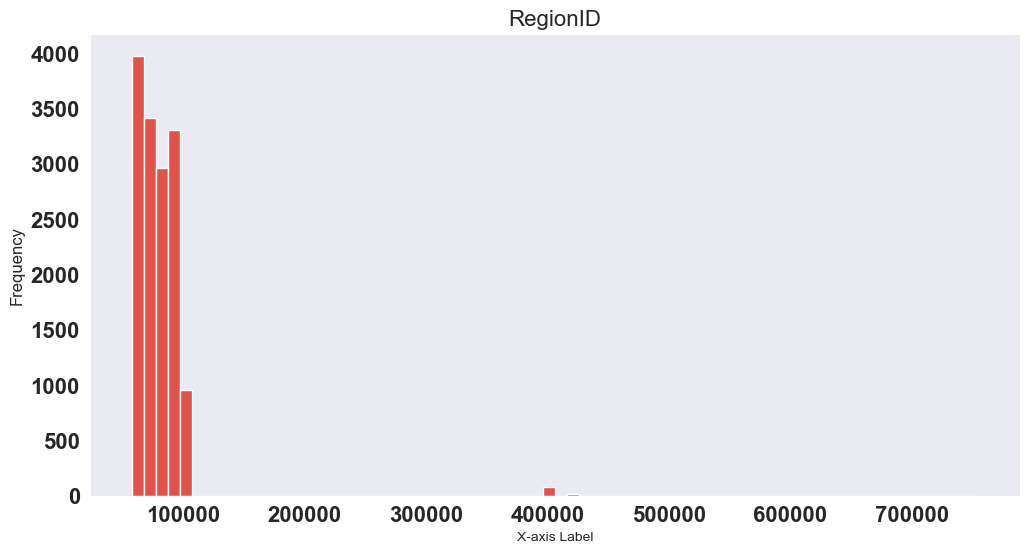

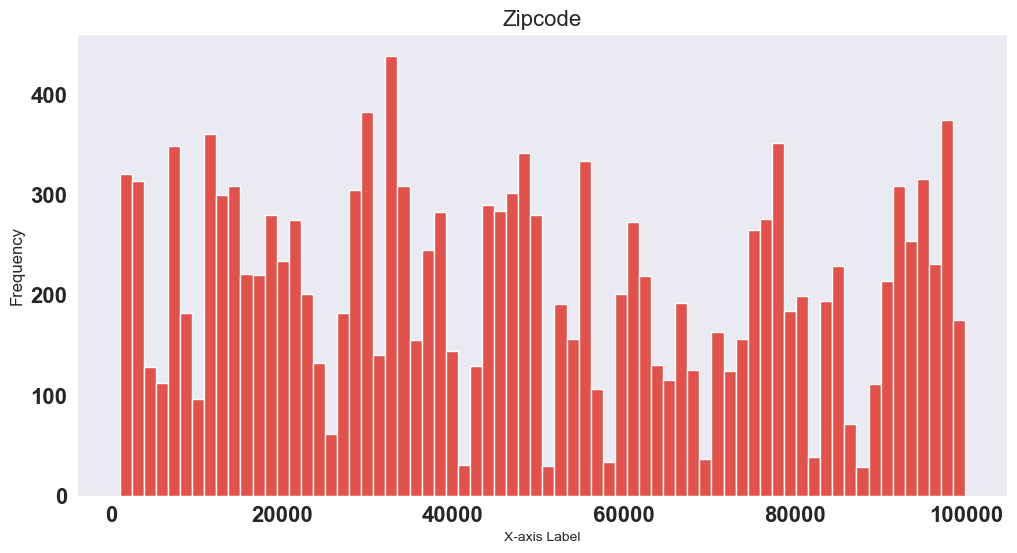

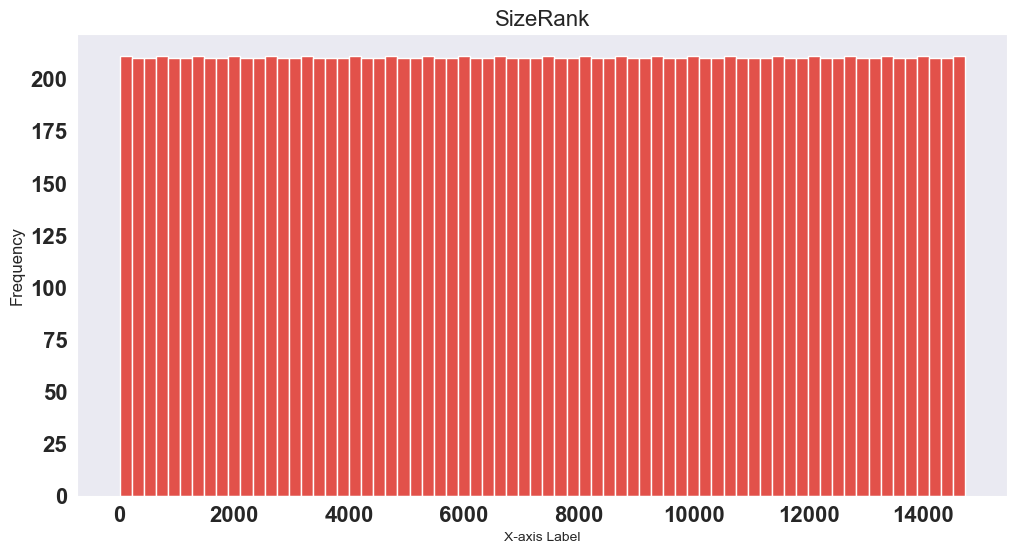

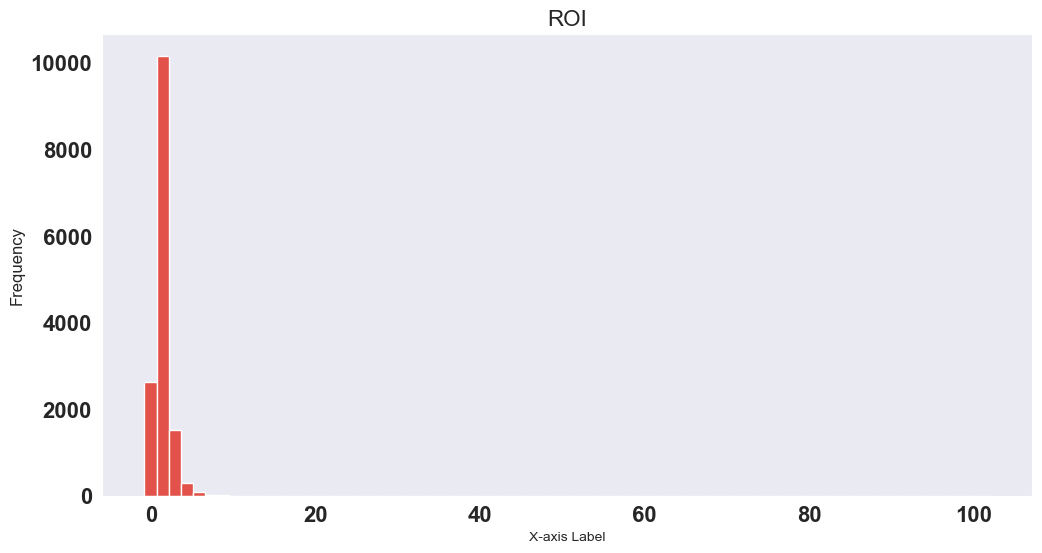

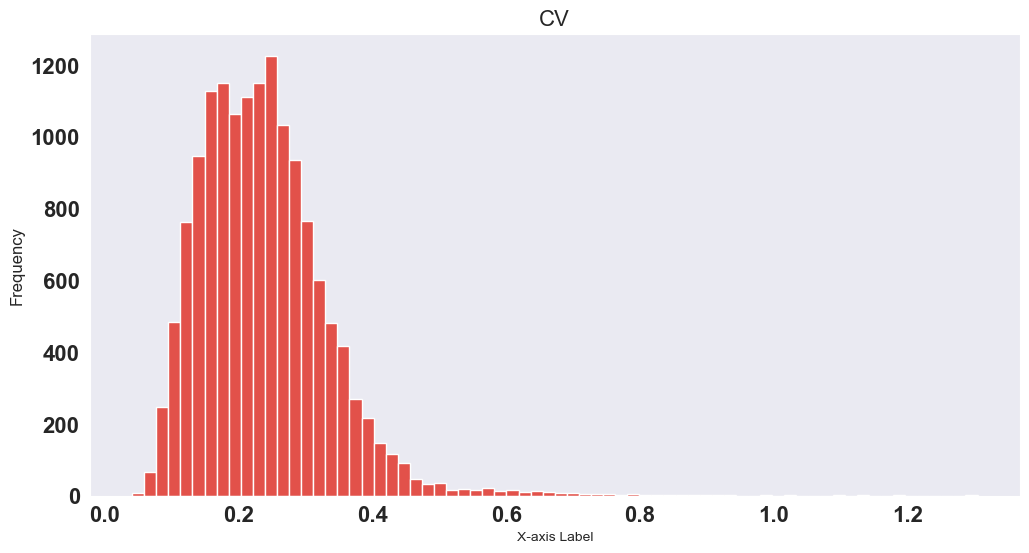

In [31]:
# Set the font size for the titles
title_fontsize = 16
tick_label_fontsize = 8 

# Loop through numeric columns and create histograms
for column in Numeric:
    plt.figure(figsize=(12, 6))  # Set the figure size
    plt.hist(eda_df[column], bins=70)
    
    # Add title and set font size
    plt.title(column, fontsize=title_fontsize)
    
    # Customize axis labels if needed
    plt.xlabel("X-axis Label", fontsize=10)
    plt.ylabel("Frequency", fontsize=12)
    # Rotate x-axis labels for better readability (optional)
    
    
    plt.grid(False)  # Add grid lines if desired
    plt.show()

In [32]:
for column in Numeric:
    eda_df[column] = pd.to_numeric(eda_df[column])

# Print the updated DataFrame
print(eda_df.head())

   RegionID  Zipcode      City State              Metro CountyName  SizeRank   
0     84654    60657   Chicago    IL            Chicago       Cook         1  \
1     90668    75070  McKinney    TX  Dallas-Fort Worth     Collin         2   
2     91982    77494      Katy    TX            Houston     Harris         3   
3     84616    60614   Chicago    IL            Chicago       Cook         4   
4     93144    79936   El Paso    TX            El Paso    El Paso         5   

        ROI        CV  
0  2.083782  0.256487  
1  0.365295  0.152680  
2  0.567966  0.143950  
3  1.623971  0.237364  
4  0.571798  0.178326  


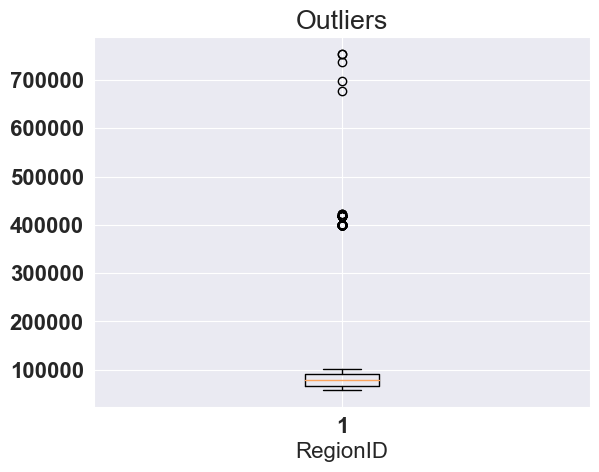

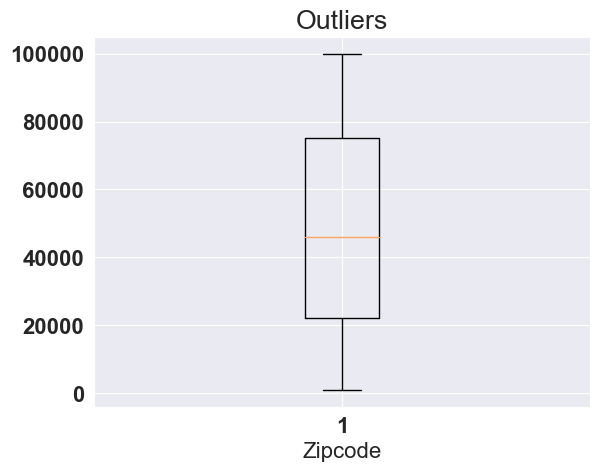

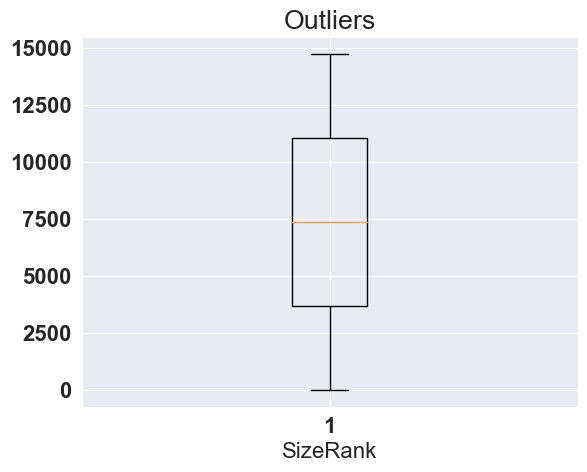

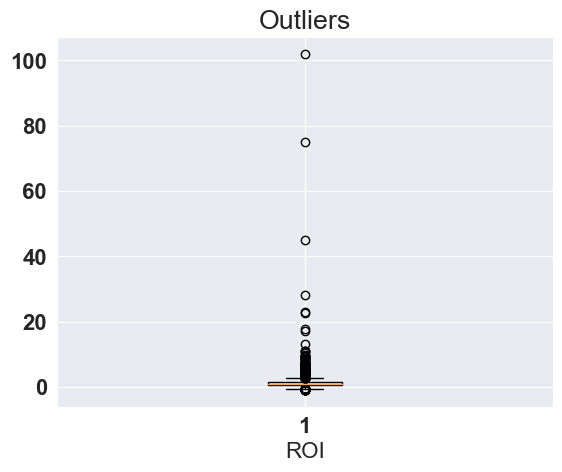

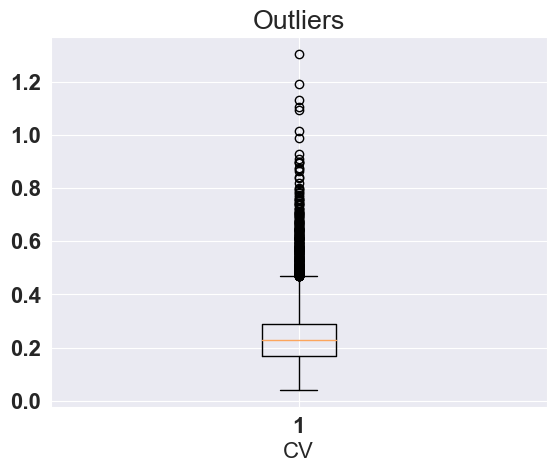

In [33]:
# Set the font size for the titles
title_fontsize = 12
tick_label_fontsize = 6

#For loop for boxplot to check for outliers
for column in Numeric:
    plt.figure()
    plt.boxplot(eda_df[column])
    plt.xlabel(column)
    plt.title('Outliers')
    
    #Display the plot
    plt.show()

In [34]:
# Removing Outliers using standard deviation
def determine_outlier_thresholds_std(Numeric, col_name):
    upper_boundary = Numeric[col_name].mean() + 3 * Numeric[col_name].std()
    lower_boundary = Numeric[col_name].mean() - 3 * Numeric[col_name].std()
    return lower_boundary, upper_boundary

In [35]:
def check_outliers_std(Numeric, col_name):
    lower_boundary, upper_boundary = determine_outlier_thresholds_std(Numeric, col_name)
    if Numeric[(Numeric[col_name] > upper_boundary) | (Numeric[col_name] < lower_boundary)].any(axis=None):
        return True
    else: 
        return False

def replace_with_thresholds_std(Numeric, cols, replace=False):
    from tabulate import tabulate
    data = []
    for col_name in cols:
        if col_name != 'Outcome':
            outliers_ = check_outliers_std(Numeric, col_name)
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_std(Numeric, col_name)
            if outliers_:
                count = Numeric[(Numeric[col_name] > upper_limit) | (Numeric[col_name] < lower_limit)][col_name].count()
                if replace:
                    if lower_limit < 0:
                        # We don't want to replace with negative values, right!
                        Numeric.loc[(Numeric[col_name] > upper_limit), col_name] = upper_limit
                    else:
                        Numeric.loc[(Numeric[col_name] < lower_limit), col_name] = lower_limit
                        Numeric.loc[(Numeric[col_name] > upper_limit), col_name] = upper_limit
            outliers_status = check_outliers_std(Numeric, col_name)
            data.append([outliers_, outliers_status,count, col_name, lower_limit, upper_limit])
    table = tabulate(data, headers=['Outlier (Previously)','Outliers','Count', 'Column','Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using 3 Standard Deviation")
    print(table)

replace_with_thresholds_std(eda_df, Numeric,replace=True)  

Removing Outliers using 3 Standard Deviation
======================  ==========  =======  ========  =============  =============
Outlier (Previously)    Outliers      Count  Column      Lower Limit    Upper Limit
======================  ==========  =======  ========  =============  =============
True                    True            106  RegionID       -14727.3         176877
False                   False                Zipcode        -39855.6         136300
False                   False                SizeRank       -5388.93        20112.9
True                    True             70  ROI            -3.16379        5.77988
True                    True            175  CV           -0.0505458       0.525179
======================  ==========  =======  ========  =============  =============


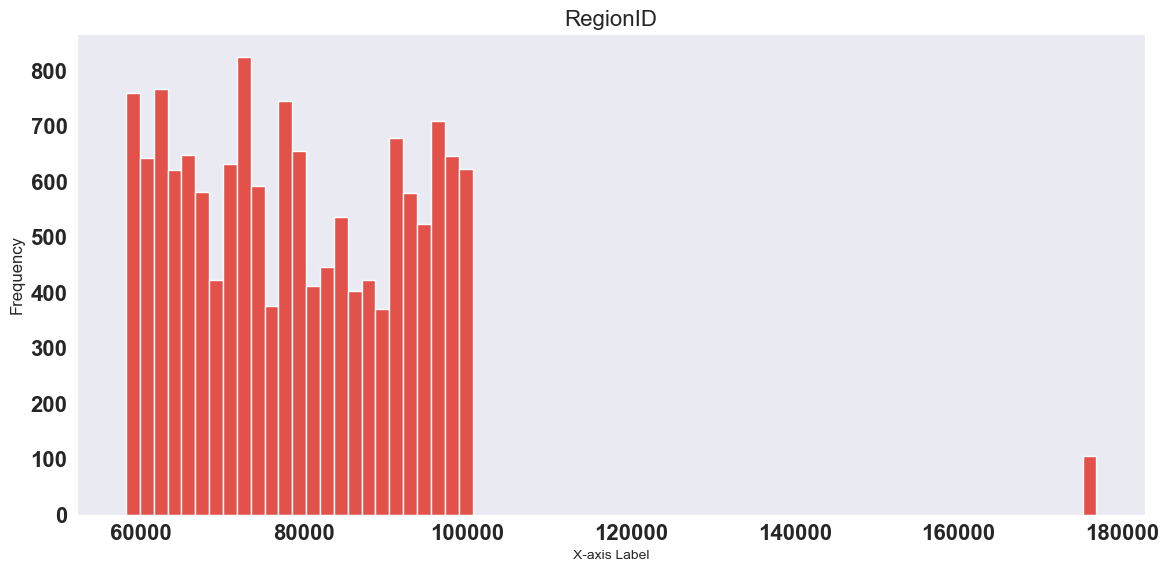

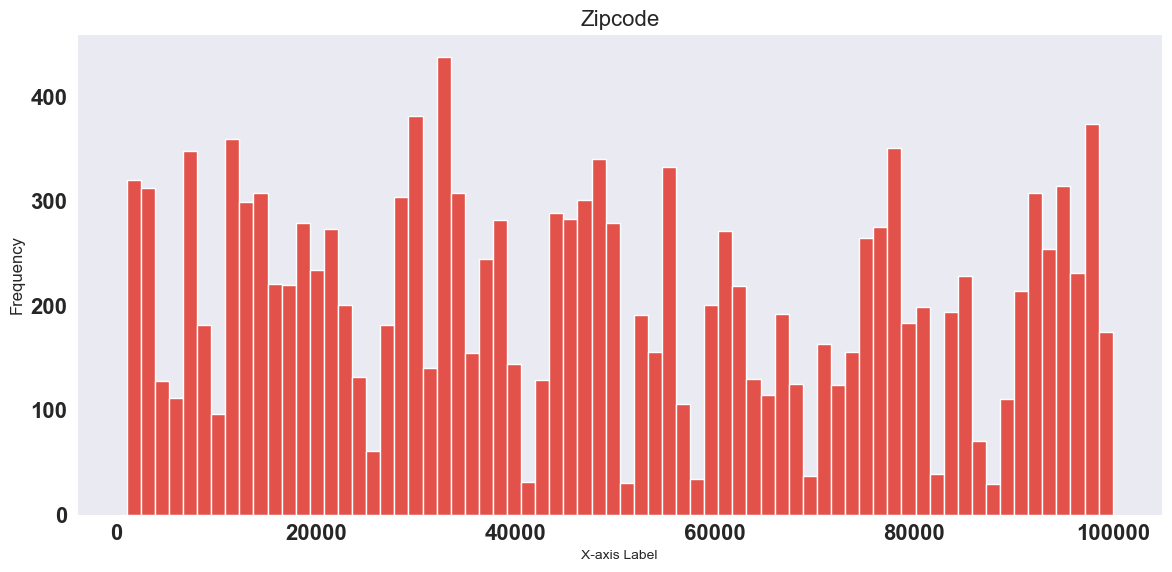

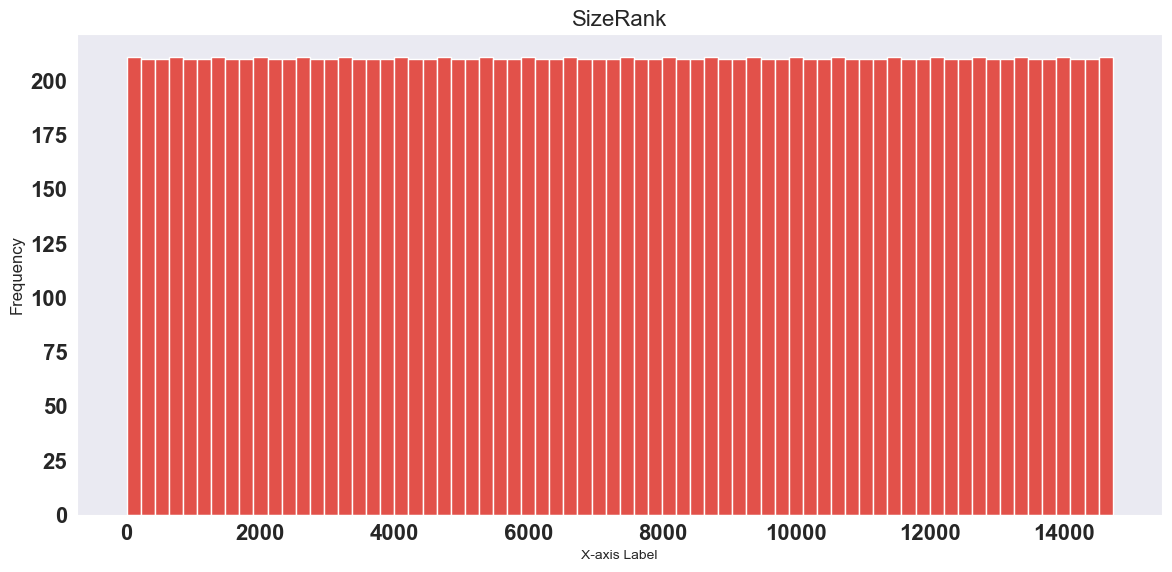

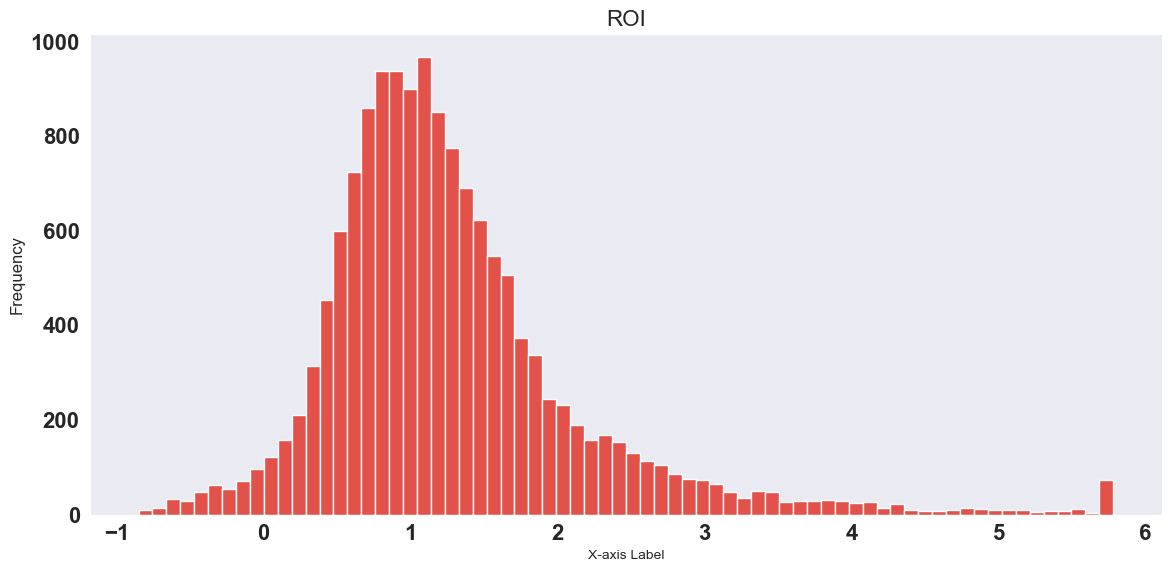

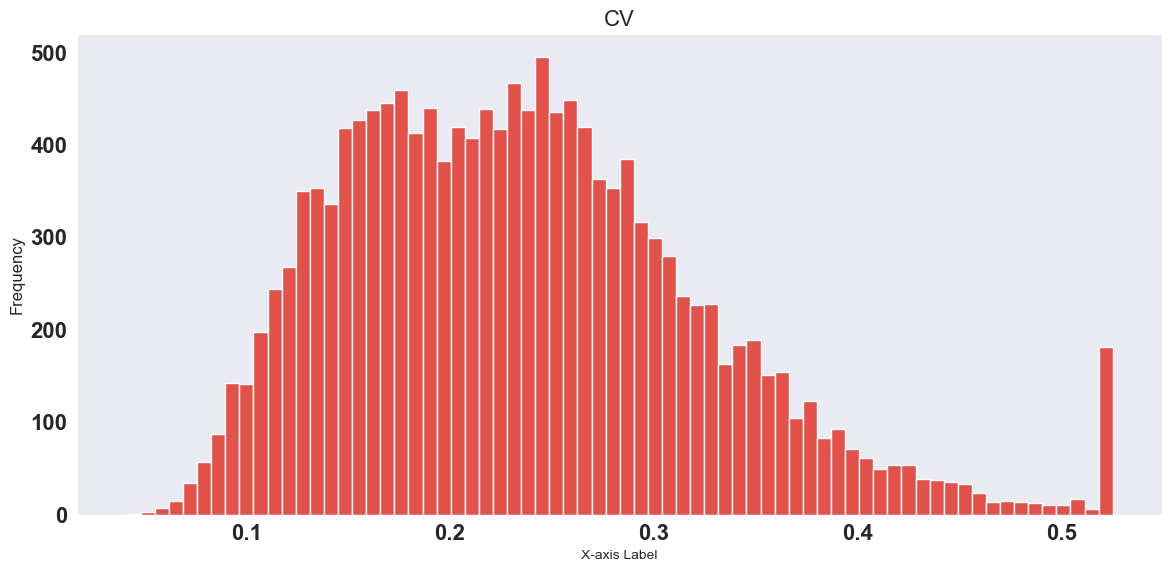

In [36]:
# Plot histograms of the cleaned dataset after removing the outliers
# Set the font size for the titles
title_fontsize = 16
tick_label_fontsize = 8 

# Loop through numeric columns and create histograms
for column in Numeric:
    plt.figure(figsize=(12, 6))  # Set the figure size
    plt.hist(eda_df[column], bins=70)
    
    # Add title and set font size
    plt.title(column, fontsize=title_fontsize)
    
    # Customize axis labels if needed
    plt.xlabel("X-axis Label", fontsize=10)
    plt.ylabel("Frequency", fontsize=12)

    # Rotate x-axis labels for better readability (optional)
    plt.tight_layout()
    
    # Add grid lines if desired
    plt.grid(False)  
    plt.show()

### 5.1.2 Categorical Variables

In [37]:
# Displaying categorical data columns
categorical = eda_df[['City','State', 'Metro', 'CountyName']]
categorical.head()

,City,State,Metro,CountyName
0,Chicago,IL,Chicago,Cook
1,McKinney,TX,Dallas-Fort Worth,Collin
2,Katy,TX,Houston,Harris
3,Chicago,IL,Chicago,Cook
4,El Paso,TX,El Paso,El Paso


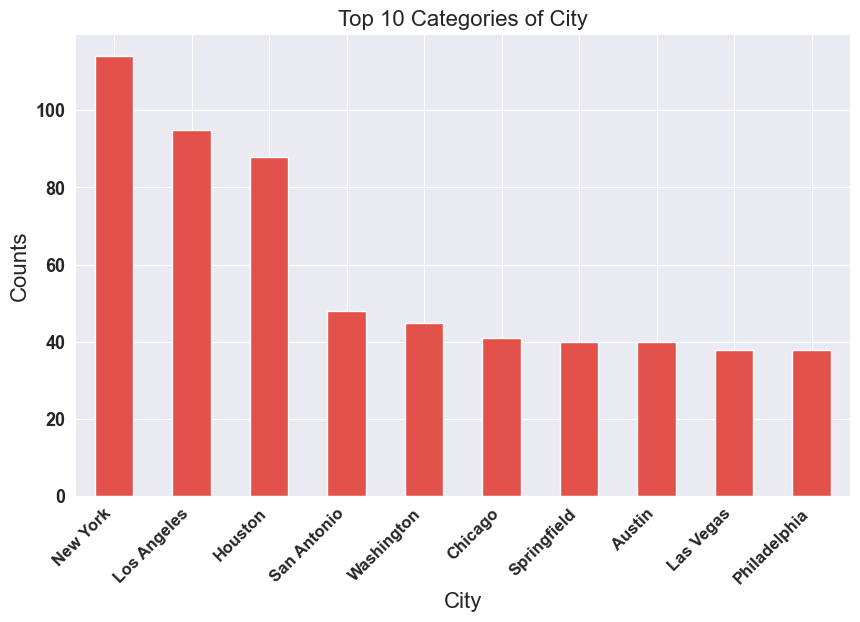

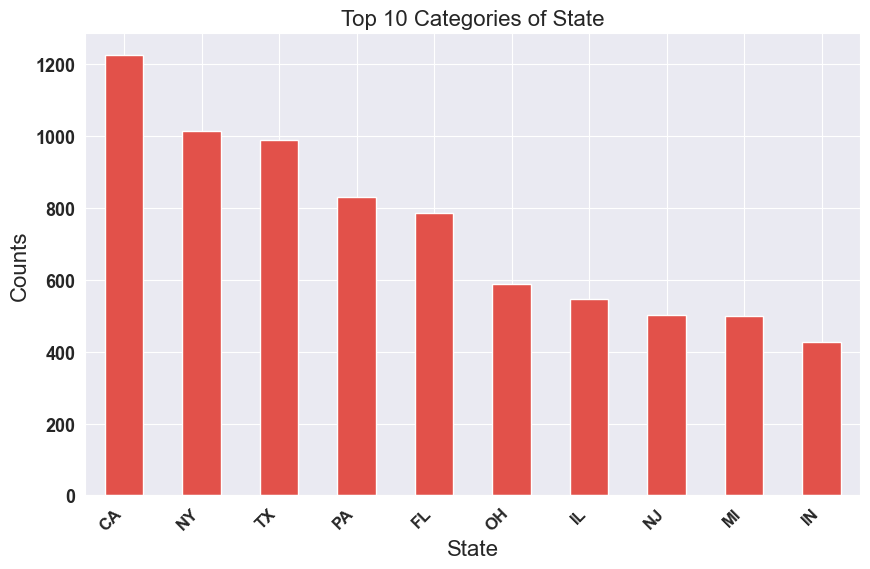

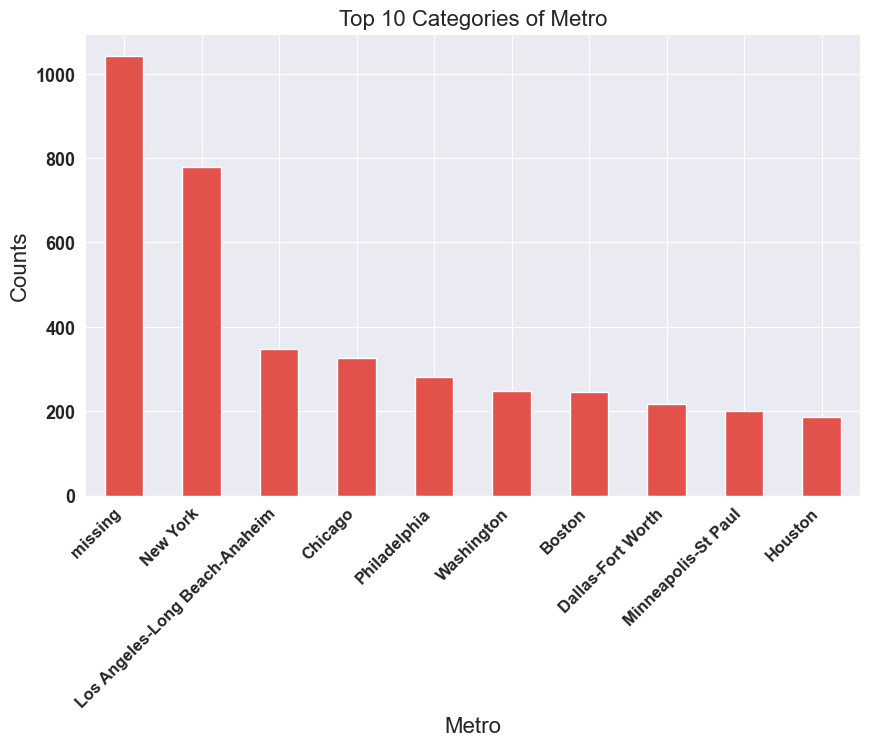

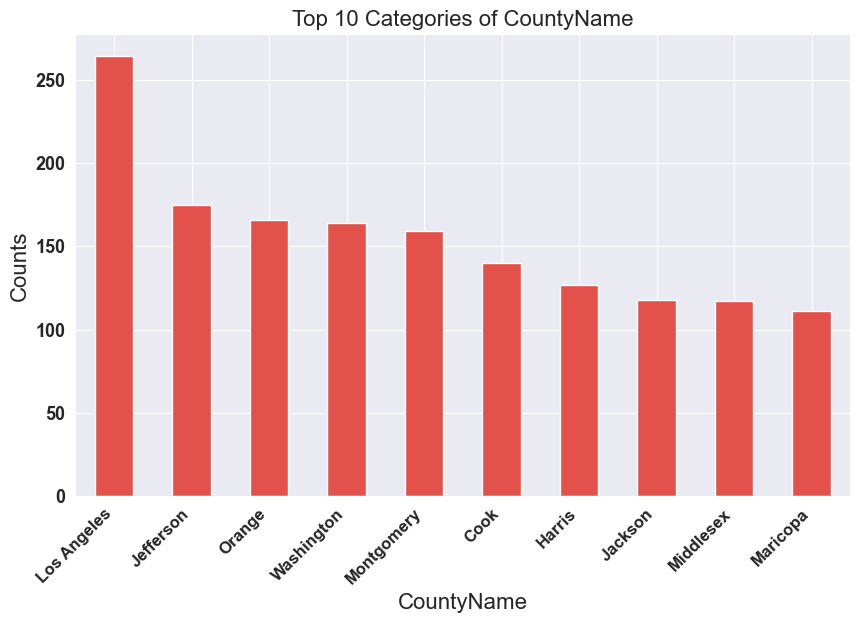

In [39]:
# Limit the number of categories to plot
top_n = 10

for column in categorical:
    # Get the top N categories by frequency
    top_categories = eda_df[column].value_counts().head(top_n)
    
    # Create a bar plot for the top categories
    plt.figure(figsize=(10, 6))
    top_categories.plot(kind='bar')
    
    plt.title(f'Top {top_n} Categories of {column}', fontsize = 16)
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize = 13)

    # Rotate x-axis labels for better readability (optional)
    plt.xticks(rotation=45, ha='right')

    plt.show()